# An example of DCNN — LeNet

Adaptado de
https://learning.oreilly.com/library/view/deep-learning-with/9781787128422/592bcfab-9b3d-43df-8348-593769e8fde0.xhtml

En el enlace se encuentran los comentarios.

### Mnist
https://en.wikipedia.org/wiki/MNIST_database

In [1]:
# import the necessary packages
# Cambio a tensorflow 2.x
# En lugar de from keras import, from tensorflow.keras import
# ciertos subpaquetes del antiguo keras desaparacen o cambian de nombre
# ver lista siguiente

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")

# from keras import backend as K
from tensorflow.keras import backend as K
# from keras.models import Sequential
from tensorflow.keras.models import Sequential
# from keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import Conv2D
# from .keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.layers import MaxPooling2D
# from w.keras.layers.core import Activation
from tensorflow.keras.layers import Activation
# from keras.layers.core import Flatten
from tensorflow.keras.layers import Flatten
# from keras.layers.core import Dense
from tensorflow.keras.layers import Dense
# from keras.datasets import mnist
from tensorflow.keras.datasets import mnist
# from tensorflow.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
# from keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1671)  # for reproducibility
tf.random.set_seed(1671)

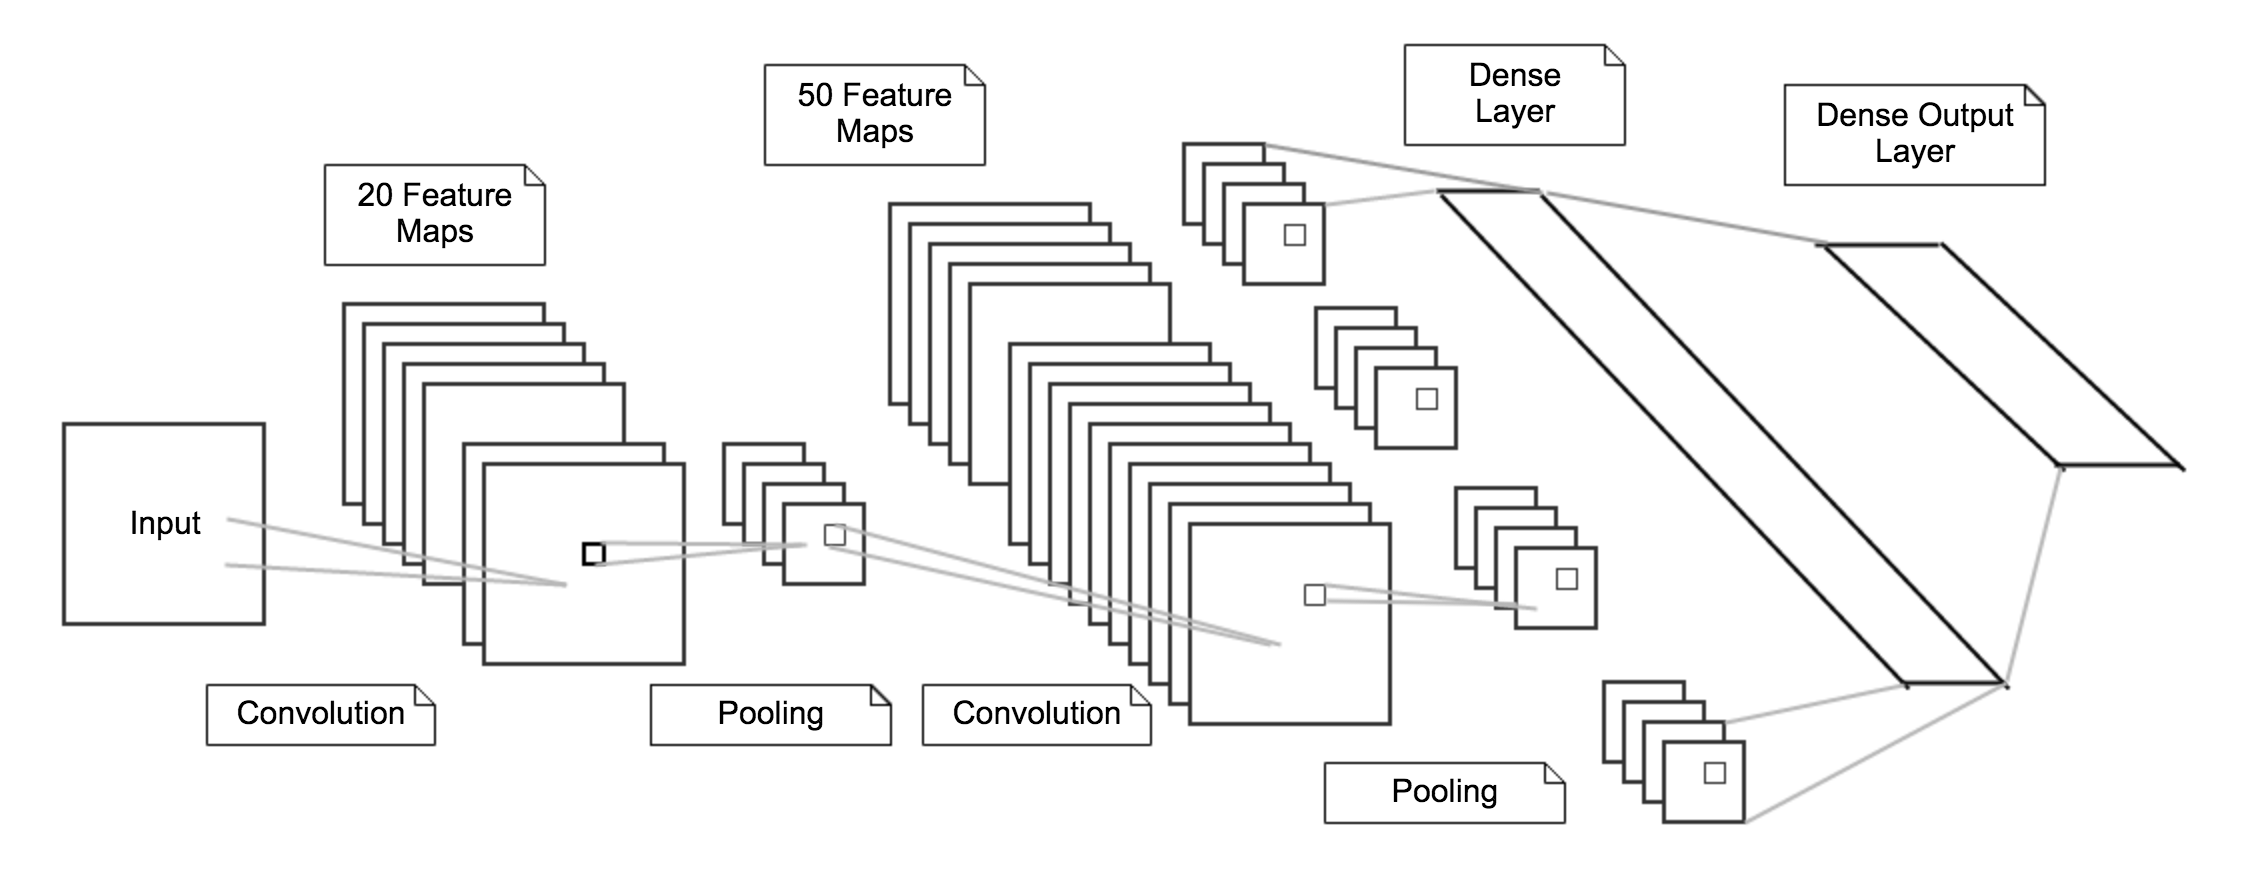

In [3]:
from IPython.display import Image
Image("images/keras_LeNet.png")

In [4]:
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        # CONV => RELU => POOL
        model.add(Conv2D(20, kernel_size=5, padding="same",
            input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # CONV => RELU => POOL
        model.add(Conv2D(50, kernel_size=5, padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # Flatten => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
 
        # a softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model

In [5]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2

IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10  # number of outputs = number of digits
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

2024-10-16 17:47:53.712228: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-10-16 17:47:53.712247: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-10-16 17:47:53.712251: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-10-16 17:47:53.712308: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-16 17:47:53.712342: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Para Keras >= 2.2.5 o tensorflow.keras
# set_image_data_format en lugar de set_image_dim_ordering
# th(theano) channel_first, tf(tensorflow) channel_last
# K.set_image_dim_ordering("th")
K.set_image_data_format("channels_first")

# reducimos el número de datos por velocidad
# si se tiene GPU o tiempo suficiente usar los totales
# para obtener mejores resultados
n_train = 6000 # total 60000
n_test = 1000 # total 10000
grey_levels = 255

# consider them as float and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= grey_levels 
X_test /= grey_levels

# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
X_train = X_train[:n_train, np.newaxis, :, :]
X_test = X_test[:n_test, np.newaxis, :, :]

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
# cambio de imports en tensorflow.keras.utils
# y_train = np_utils.to_categorical(y_train[:n_train], NB_CLASSES)
# y_test = np_utils.to_categorical(y_test[:n_test], NB_CLASSES)
y_train = to_categorical(y_train[:n_train], NB_CLASSES)
y_test = to_categorical(y_test[:n_test], NB_CLASSES)

6000 train samples
1000 test samples


In [7]:
# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.summary()
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
    metrics=["accuracy"])

history = model.fit(X_train, y_train, 
        batch_size=BATCH_SIZE, epochs=NB_EPOCH, 
        verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 28, 28)        520       
                                                                 
 activation (Activation)     (None, 20, 28, 28)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 20, 14, 14)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 14, 14)        25050     
                                                                 
 activation_1 (Activation)   (None, 50, 14, 14)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 7, 7)          0         
 g2D)                                                   

Epoch 1/20


2024-10-16 17:47:55.027913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - ETA: 0s - loss: 0.8213 - accuracy: 0.7492

2024-10-16 17:48:00.649999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - 6s 55ms/step - loss: 0.8213 - accuracy: 0.7492 - val_loss: 0.3172 - val_accuracy: 0.9000
Epoch 2/20
38/38 [==============================] - 1s 33ms/step - loss: 0.2212 - accuracy: 0.9369 - val_loss: 0.1972 - val_accuracy: 0.9433
Epoch 3/20
38/38 [==============================] - 1s 33ms/step - loss: 0.1418 - accuracy: 0.9569 - val_loss: 0.1347 - val_accuracy: 0.9642
Epoch 4/20
38/38 [==============================] - 1s 32ms/step - loss: 0.0908 - accuracy: 0.9706 - val_loss: 0.1180 - val_accuracy: 0.9667
Epoch 5/20
38/38 [==============================] - 1s 33ms/step - loss: 0.0752 - accuracy: 0.9756 - val_loss: 0.1112 - val_accuracy: 0.9700
Epoch 6/20
38/38 [==============================] - 1s 33ms/step - loss: 0.0494 - accuracy: 0.9852 - val_loss: 0.1016 - val_accuracy: 0.9683
Epoch 7/20
38/38 [==============================] - 1s 33ms/step - loss: 0.0405 - accuracy: 0.9873 - val_loss: 0.1128 - val_accuracy: 0.9683
Epoch 8/20
38/38 [======

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


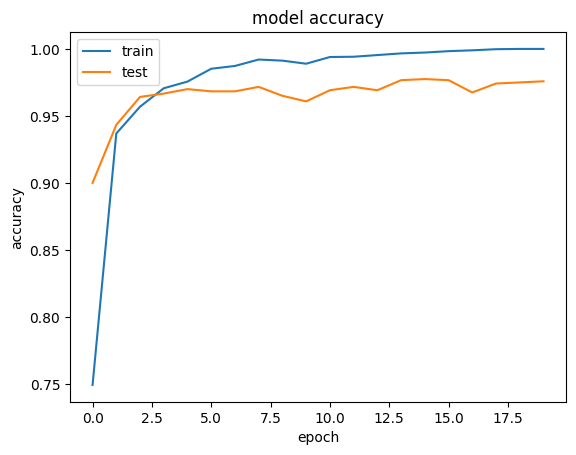

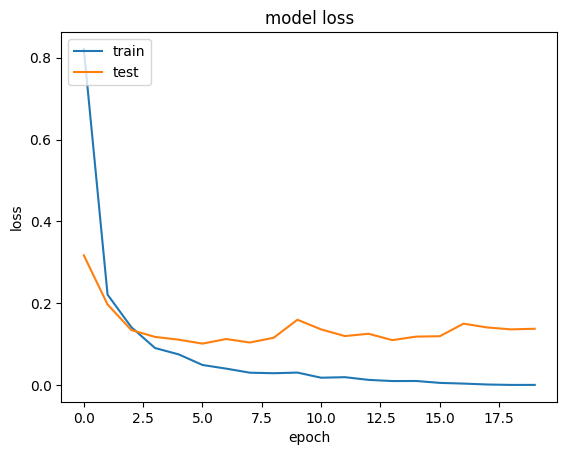

In [8]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
# Liberar recursos GPU
# descomentar si se usa GPU

# from numba import cuda
# cuda.select_device(0)
# cuda.close()